In [5]:
import os, sys
script_dir = os.getcwd()
module_path = script_dir
for _ in range(5):
    module_path = os.path.abspath(os.path.join(module_path, '../'))
    if module_path not in sys.path:
        sys.path.insert(0,module_path)
    if os.path.basename(module_path).lower() =='frame':
        break
from src.unit import Unit
from src.operators import *
import src.operators
from src.operator_base import op_type_dicts
from src.system import System
import pandas as pd
from src.analye_model import *
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# print(sys.path,module_path)
from utils.display_and_plots import *

,Op Type,Dimension,Op Intensity,Num ops (MFLOP),Input_a (MB),Input_w (MB),Output (MB),Total Data (MB),Bound,Compute Cycles,Memory Cycles,C/M ratio,Cycles,% of total time,Throughput (Tflops),Latency (msec),C Effcy
0,GEMM,[ 1 768 512 768],219.428571,603.979776,0.375000,0.562500,0.375000,1.312500,C,4608.000000,2677.408854,1.721067,4608.000000,6.527330,123.207680,0.004902,1.000000
1,GEMM,[ 1 768 512 768],219.428571,603.979776,0.375000,0.562500,0.375000,1.312500,C,4608.000000,2677.408854,1.721067,4608.000000,6.527330,123.207680,0.004902,1.000000
2,GEMM,[ 1 768 512 768],219.428571,603.979776,0.375000,0.562500,0.375000,1.312500,C,4608.000000,2677.408854,1.721067,4608.000000,6.527330,123.207680,0.004902,1.000000
3,Logit,[ 1 12 512 512 64],51.200000,402.653184,0.375000,0.375000,3.000000,3.750000,M,3072.000000,7649.739583,0.401582,7649.739583,10.836019,49.478023,0.008138,1.000000
4,Attend,[ 1 12 512 512 64],51.200000,402.653184,3.000000,0.375000,0.375000,3.750000,M,3072.000000,7649.739583,0.401582,7649.739583,10.836019,49.478023,0.008138,1.000000
5,GEMM,[ 1 768 512 768],219.428571,603.979776,0.375000,0.562500,0.375000,1.312500,C,4608.000000,2677.408854,1.721067,4608.000000,6.527330,123.207680,0.004902,1.000000
6,GEMM,[ 1 3072 512 768],279.272727,2415.919104,0.375000,2.250000,1.500000,4.125000,C,18432.000000,8414.713542,2.190449,18432.000000,26.109321,123.207680,0.019609,1.000000
7,GEMM,[ 1 768 512 3072],279.272727,2415.919104,1.500000,2.250000,0.375000,4.125000,C,18432.000000,8414.713542,2.190449,18432.000000,26.109321,123.207680,0.019609,1.000000


,Latency (msec),Cycles,MACs (MFLOPS),Total Data (MB),Total Weights (MB),Parameters (MB),On-chip Memory Footprint (MB)
0,0.08,70595.48,8053.06,21.00,7.50,6.75,4.12


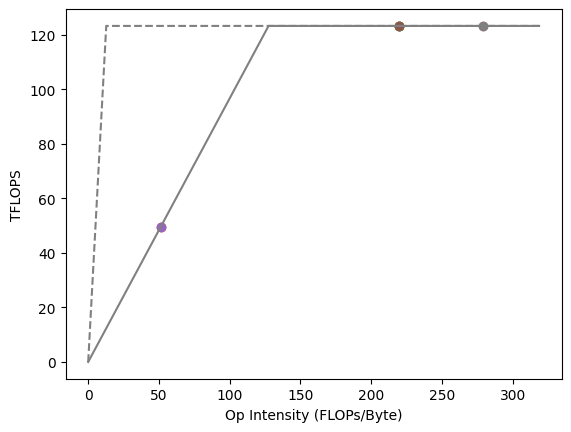

In [7]:

# model = 'vgg16'
# data_path = os.path.join(module_path,"data")

seq_len = 512
model = 'BERT'
data_path = os.path.join(module_path,"data")
model_path = os.path.join(data_path,"model")
create_model(seq_len, name=model, data_path=data_path)
# print(model_path)

batch_size = 1
unit = Unit()
system = System(unit)
model_df = get_model_df(model = model+'_vanilla', system=system, unit=unit, 
                        batch_size=batch_size, data_path=data_path, sparse=False, FLAT_enabled = False )
display_df(model_df)

dot_roofline(model_df, system, unit)
get_summary_table(model_df)